<a href="https://colab.research.google.com/github/Riteshdahal/BioEthanolfromSawdust/blob/main/Final_BioEthanol_Model(H2SO4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
#data is for H2SO4
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
df

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical ),Ethanol Yield (Theoretical)
0,100,0.60,10.2,6.80
1,100,6.00,26.4,25.46
2,100,11.00,50.8,49.00
3,100,17.82,92.9,80.90


In [ ]:
mean=df.mean()
mean

SawDust(Gram)                   100.000
AcidConcentration(mol/L)          8.855
Glucose Yield (Theoretical )     45.075
Glucose Yield                       NaN
Ethanol Yield (Theoretical)      40.540
Ethanol Yield                       NaN
dtype: float64

In [ ]:
SD=df.std()
SD

SawDust(Gram)                    0.000000
AcidConcentration(mol/L)         7.331855
Glucose Yield (Theoretical )    35.986236
Glucose Yield                         NaN
Ethanol Yield (Theoretical)     31.970274
Ethanol Yield                         NaN
dtype: float64

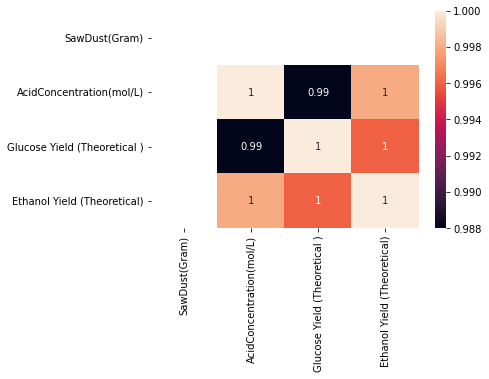

In [ ]:
#correlation coefficient 
r = df.corr().round(3)
sns.heatmap(r, annot=True)
plt.show()

In [ ]:
#testing Data for H2SO4
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data1.csv")
df2

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (practical ),Ethanol Yield (Practical)
0,100,0.60,0.02,0.002
1,100,6.00,20.00,17.000
2,100,11.00,42.30,35.000
3,100,17.82,70.00,58.000


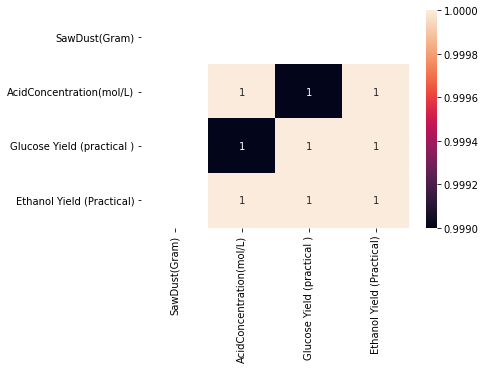

In [ ]:
#correlation coefficient 
r = df2.corr().round(3)
sns.heatmap(r, annot=True)
plt.show()

In [ ]:
#for training we are only using X value(saw dust,acid conc and Glucose) As Y is Ethanol Yield
#training data for H2SO4
X=df.drop(columns="Ethanol Yield (Theoretical)")
X

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical )
0,100,0.60,10.2
1,100,6.00,26.4
2,100,11.00,50.8
3,100,17.82,92.9


In [ ]:
Y=df["Ethanol Yield (Theoretical)"]
Y

0     6.80
1    25.46
2    49.00
3    80.90
Name: Ethanol Yield (Theoretical), dtype: float64

In [ ]:
lr=LinearRegression()


In [ ]:
lr.fit(X,Y)

LinearRegression()

In [ ]:
c=lr.intercept_
c

1.2222523525629683

In [ ]:
m=lr.coef_
m


array([0.        , 2.53036064, 0.37518368])

In [ ]:
y_training_predict=lr.predict(X)
y_training_predict


array([ 6.56734223, 26.30926523, 48.11555011, 81.16784243])

In [ ]:
r2=r2_score(Y,y_training_predict)
r2

0.999468618601364

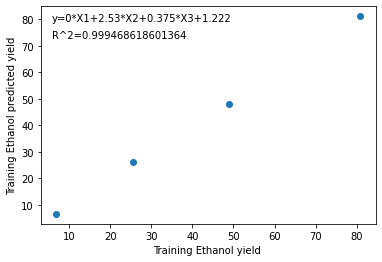

In [ ]:

plt.scatter (Y,y_training_predict)
plt.figtext(0.15,0.83,f'y=0*X1+2.53*X2+0.375*X3+1.222')
plt.figtext(0.15,0.77,f'R^2={r2}')

plt.xlabel("Training Ethanol yield ")
plt.ylabel("Training Ethanol predicted yield")
plt.show()

In [ ]:
r2_score(Y,y_training_predict)

0.999468618601364

In [ ]:
X_test=df2.drop(columns="Ethanol Yield (Practical)")
X_test

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (practical )
0,100,0.60,0.02
1,100,6.00,20.00
2,100,11.00,42.30
3,100,17.82,70.00


In [ ]:
Y_test=df2["Ethanol Yield (Practical)"]
Y_test

0     0.002
1    17.000
2    35.000
3    58.000
Name: Ethanol Yield (Practical), dtype: float64

In [ ]:
y_predict_test=lr.predict(X_test)
y_predict_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Glucose Yield (practical )
Feature names seen at fit time, yet now missing:
- Glucose Yield (Theoretical )

  warnings.warn(message, FutureWarning)


array([ 2.74797241, 23.9080897 , 44.92648887, 72.57613624])

In [ ]:
r2=r2_score(Y_test,y_predict_test)
r2

0.8023298759677286

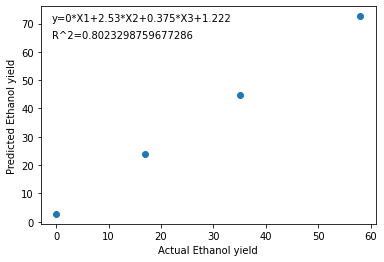

In [ ]:
plt.scatter(Y_test,y_predict_test)
plt.figtext(0.15,0.83,f'y=0*X1+2.53*X2+0.375*X3+1.222')
plt.figtext(0.15,0.77,f'R^2={r2}')
#plt.plot(Y_test,y_predict_test)
plt.xlabel("Actual Ethanol yield")
plt.ylabel("Predicted Ethanol yield")
plt.show()

In [ ]:
r2_score(Y_test,y_predict_test)

0.8023298759677286